# K-means Clustering

# Import all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Mall customer Segmentation Data

In [17]:
data=pd.read_csv('Mall_Customers.csv')

### Display first 5 rows

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing of data

### Check for null values in each column

In [4]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###  Change in Genre column text 'Female' to 0 and 'Male'  to 1

In [18]:
data['Genre'].replace({'Male':1,'Female':0},inplace=True)

# Analyze the common patterns while visualising it with different methods

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ce88d0>]],
      dtype=object)

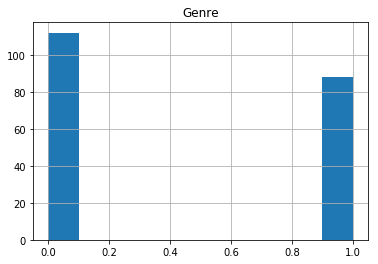

In [6]:
data.hist('Genre')

### Heatmap

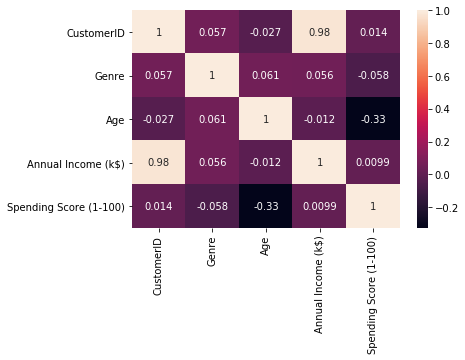

In [7]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### Distance plotting 

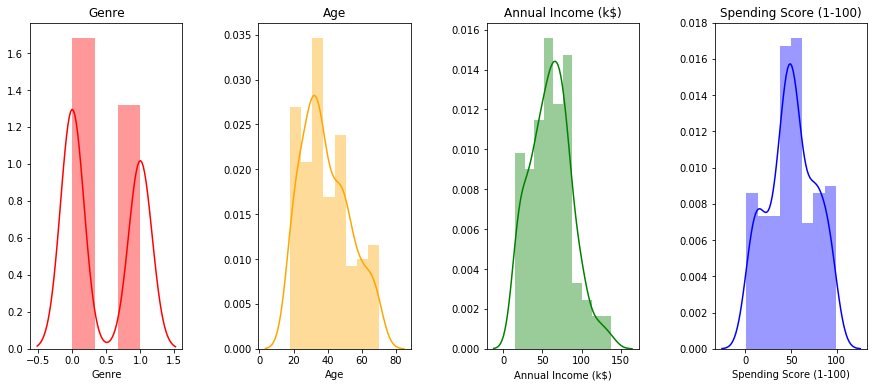

In [8]:
plt.figure(1,figsize=(15,6))
n=0
color=['red','orange','green','blue']
count=0
for x in ['Genre','Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,4,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(data[x],color=color[count])
    plt.title('{}'.format(x))
    count+=1
plt.show()    

## Choose the deired column used for clustering

In [9]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]

In [10]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Visualize the original unclustered dataset

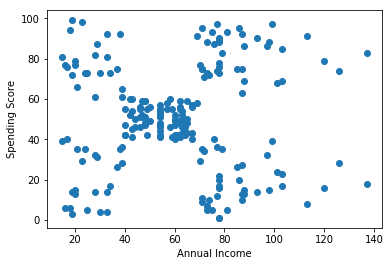

In [11]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Kmeans Modelling

#### Step 1  - Choose the number of clusters (k) 
#### Step 2-select random centroid for each cluster
####  Step 3 - Assign all the points to the closest cluster centroid
#### Step 4 - Recompute centroids of newly formed clusters
#### Step 5 - Repeat step 3 and 4

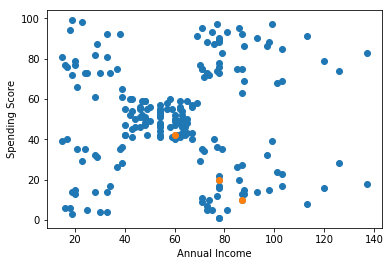

In [19]:
K=3
Centroids=(data.sample(n=K))
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.scatter(Centroids['Annual Income (k$)'],Centroids['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [20]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row1 in Centroids.iterrows():
        ED=[]
        for index2 ,row2 in X.iterrows():
            d1=(row1['Spending Score (1-100)']-row2['Spending Score (1-100)'])**2
            d2=(row1['Annual Income (k$)']-row2['Annual Income (k$)'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X['Cluster']=C
    Centroids_new=X.groupby(['Cluster']).mean()[["Annual Income (k$)","Spending Score (1-100)"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff=(Centroids_new['Annual Income (k$)']-Centroids['Annual Income (k$)']).sum()+(Centroids_new['Spending Score (1-100)']-Centroids['Spending Score (1-100)']).sum()
        print(diff.sum())
    Centroids=X.groupby(['Cluster']).mean()[["Annual Income (k$)","Spending Score (1-100)"]]

6.484520039825766
15.30487390082262
9.800622469635634
4.144055289490122
0.0


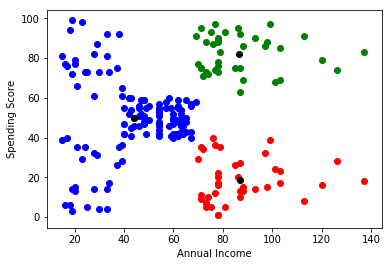

In [22]:
color=['blue','green','red']
for i in range(K):
    data=X[X['Cluster']==i+1]
    plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=color[i])
plt.scatter(Centroids['Annual Income (k$)'],Centroids['Spending Score (1-100)'],color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# When k=5 then again train and visualisation of data

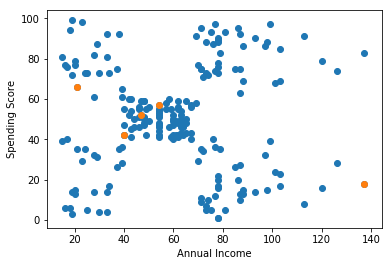

In [12]:
K=5
Centroids=(data.sample(n=K))
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.scatter(Centroids['Annual Income (k$)'],Centroids['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
diff=1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row1 in Centroids.iterrows():
        ED=[]
        for index2 ,row2 in X.iterrows():
            d1=(row1['Spending Score (1-100)']-row2['Spending Score (1-100)'])**2
            d2=(row1['Annual Income (k$)']-row2['Annual Income (k$)'])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1]<min_dist:
                min_dist=row[i+1]
                pos=i+1
        C.append(pos)
    X['Cluster']=C
    Centroids_new=X.groupby(['Cluster']).mean()[["Annual Income (k$)","Spending Score (1-100)"]]
    if j==0:
        diff=1
        j=j+1
    else:
        diff=(Centroids_new['Annual Income (k$)']-Centroids['Annual Income (k$)']).sum()+(Centroids_new['Spending Score (1-100)']-Centroids['Spending Score (1-100)']).sum()
        print(diff.sum())
    Centroids=X.groupby(['Cluster']).mean()[["Annual Income (k$)","Spending Score (1-100)"]]

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


-2.60429037523744
-4.2354784484146535
0.5202668318042818
0.0


## Visualize the clustered data

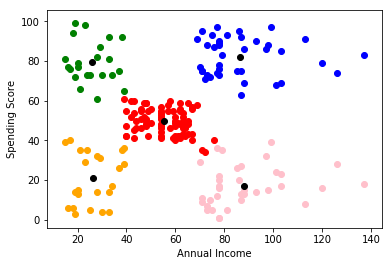

In [15]:
color=['pink','orange','blue','green','red']
for i in range(K):
    data=X[X['Cluster']==i+1]
    plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=color[i])
plt.scatter(Centroids['Annual Income (k$)'],Centroids['Spending Score (1-100)'],color='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()